In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<style>
    *{
        font-family:copperplate;
    }
</style>
<h1>THE TITANIC DATA</h1>
<h4>The Titanic dataset is one of the most famous datasets in data science and machine learning. It contains information about the passengers aboard the Titanic, which sank on its maiden voyage in 1912.</h4>

<p>Here’s a breakdown of what each column in the Titanic dataset typically means:</p>
<b>PassengerId:</b>A unique identifier for each passenger in the dataset.

<b>Survived:</b> Indicates whether the passenger survived the disaster (1 = Survived, 0 = Did not survive).

<b>Pclass:</b> The class in which the passenger was traveling (1 = 1st class, 2 = 2nd class, 3 = 3rd class). This is a proxy for socioeconomic status (SES).

<b>Name:</b> The full name of the passenger.

<b>Sex:</b> The gender of the passenger (male or female).

<b>Age:</b> The age of the passenger in years. Fractions indicate that the passenger is less than one year old. This column may have some missing values.

<b>SibSp:</b> The number of siblings or spouses the passenger had aboard the Titanic.
<ul>
    <li><b>Spouses:</b> Husbands and wives (mistresses and fiancés were ignored).</li>
    <li><b>Siblings:</b> Brothers, sisters, stepbrothers, stepsisters.</li>
</ul>

<b>Parch:</b> The number of parents or children the passenger had aboard the Titanic.
<ul>
    <li><b>Parent:</b> Mother or father.</li>
    <li><b>Child:</b> Daughter, son, stepdaughter, stepson. Some children traveled only with a nanny,therefore Parch = 0 for them.</li>
</ul>

 
<b>Ticket:</b> The ticket number for the passenger.

<b>Fare:</b> The amount of money the passenger paid for the ticket (in British pounds).

<b>Cabin:</b> The cabin number where the passenger stayed. This column may have some missing values.

<b>Embarked:</b> The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

These features can be used to build predictive models, for example, to estimate the likelihood of survival based on factors like age, gender, passenger class, etc.

In [64]:
df=pd.read_csv("titanic_data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
df.shape

(891, 12)

In [68]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.duplicated().sum()

0

<b style="font-family:copperplate;">
   Number of people survived[1] /not survived[0] the titanic incident</b>

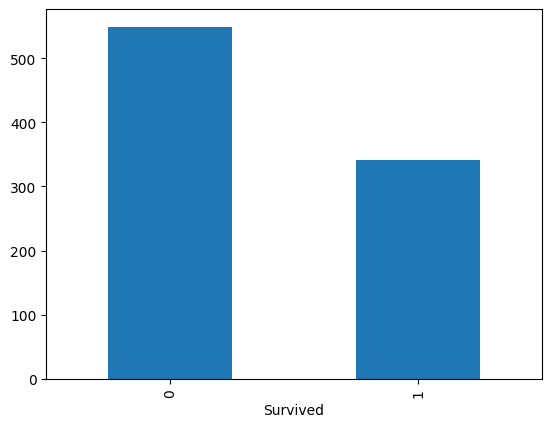

In [71]:
df['Survived'].value_counts().plot(kind='bar')
plt.show()


In [72]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<b style="font-family:copperplate;">Number of people survived[1]/not survived[0] who were travelling in 3 different passenger class 1 , 2 & 3.</b>


<Axes: xlabel='Survived', ylabel='count'>

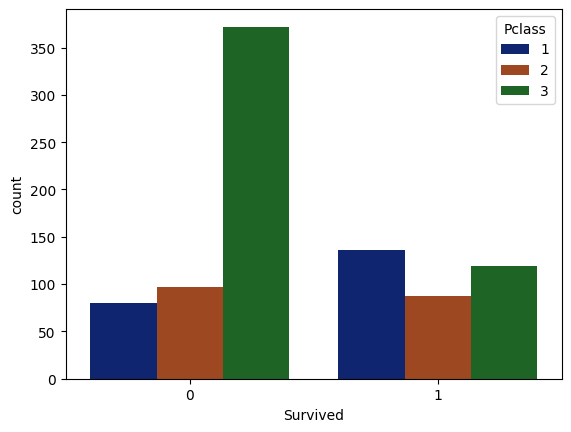

In [73]:
sns.countplot(x=df['Survived'],hue='Pclass',data=df,palette='dark')

In [74]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64


<b style="font-family:copperplate;">Number of males/females those who survived[1] / not survived [0]</b>


<Axes: xlabel='Survived', ylabel='count'>

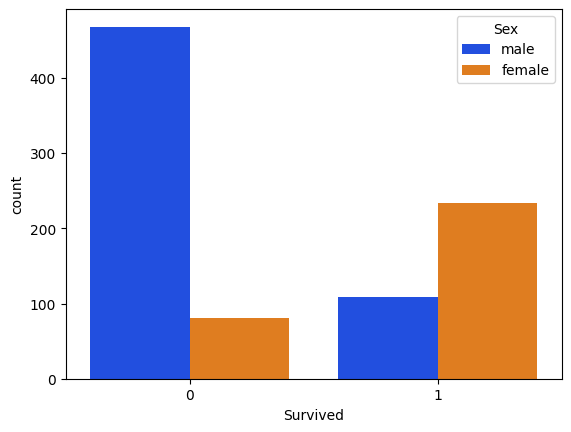

In [75]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='bright')

  
<b style="font-family:copperplate;">Number of people with different ages travelling on the TITANIC</b>


<Axes: xlabel='Age', ylabel='Count'>

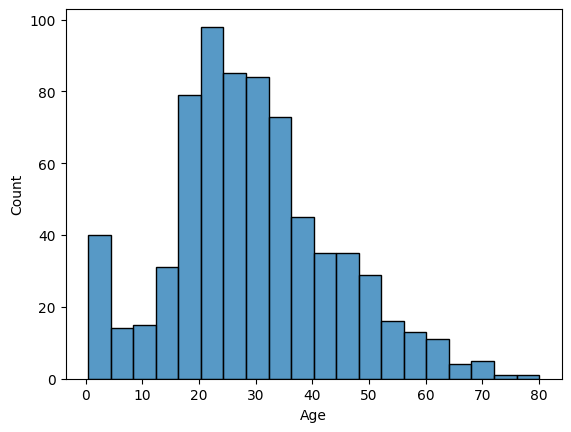

In [76]:
sns.histplot(df['Age'].dropna(),kde=False)

In [77]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<b style="font-family:copperplate;">Number of Spouse / Sibling of a passenger ,on board</b>


C:\Users\nproh\AppData\Local\Temp\ipykernel_7808\1687038349.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['SibSp'],data=df,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

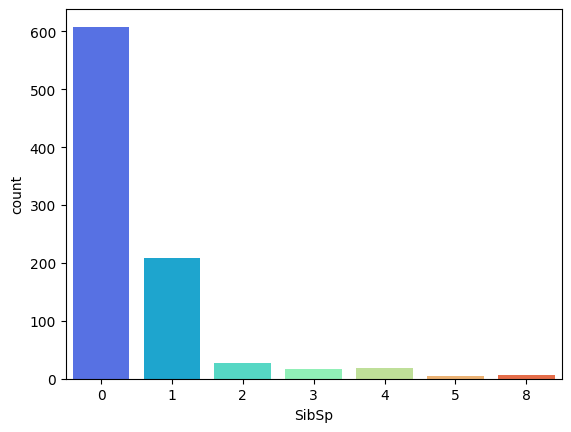

In [78]:
sns.countplot(x=df['SibSp'],data=df,palette='rainbow')

In [79]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<b style="font-family:copperplate;">Number of parents/children of a passenger , on board</b>


C:\Users\nproh\AppData\Local\Temp\ipykernel_7808\1579669607.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Parch'],data=df,palette='bright')


<Axes: xlabel='Parch', ylabel='count'>

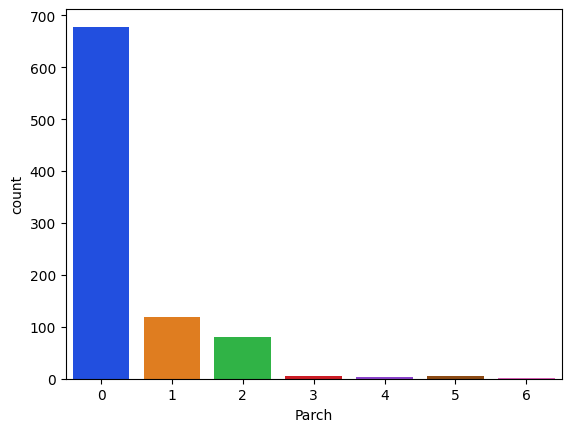

In [80]:
sns.countplot(x=df['Parch'],data=df,palette='bright')

In [81]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

<Axes: >

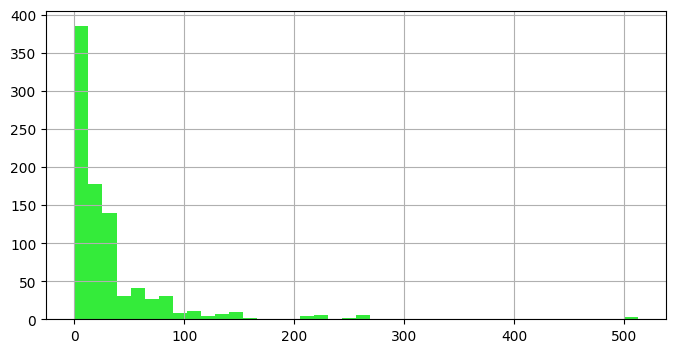

In [82]:
df['Fare'].hist(color='#34eb3a',bins=40,figsize=(8,4))

In [83]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [84]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<b style="font-family:copperplate;">The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).</b>


<Axes: xlabel='Survived', ylabel='count'>

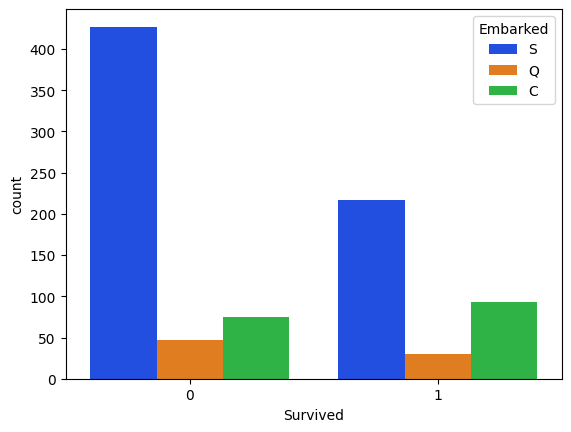

In [85]:
sns.countplot(x=df['Survived'],hue=df['Embarked'],palette='bright')

In [86]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [87]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


<b style="font-family:copperplate;">Number of people survived/not survived of different age group</b>


<Axes: xlabel='Survived', ylabel='Age'>

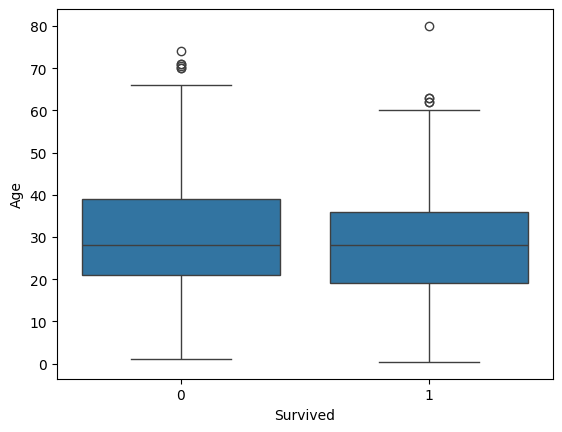

In [88]:
sns.boxplot(x=df['Survived'],y=df['Age'])

C:\Users\nproh\AppData\Local\Temp\ipykernel_7808\3877620472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Pclass'],y=df['Age'],data=df,palette='dark')


<Axes: xlabel='Pclass', ylabel='Age'>

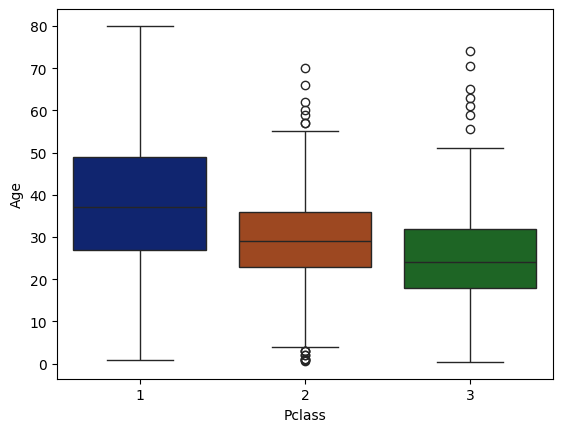

In [89]:
sns.boxplot(x=df['Pclass'],y=df['Age'],data=df,palette='dark')

In [90]:
def input_age(enter):
  Age=enter[0]
  Pclass=enter[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 36
    elif Pclass==2:
      return 28
    elif Pclass==3:
      return 22
  else:
    return Age

In [91]:
df['Age']=df[['Age','Pclass']].apply(input_age,axis=1)

C:\Users\nproh\AppData\Local\Temp\ipykernel_7808\2094408624.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=enter[0]
C:\Users\nproh\AppData\Local\Temp\ipykernel_7808\2094408624.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=enter[1]


In [92]:
df.drop('Cabin',axis=1,inplace=True)

In [93]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
